# Daten gleich, Konfidenzintervalle anders. Wie kann das sein?

Hi! Schön, dass Du wieder dabei bist. Mir ist aufgefallen, dass viele Python-Packages (und Menschen) Konfidenzintervalle immer auf die gleiche Art und Weise berechnen und dabei implizite Prämissen annehmen, die nicht zwangsläufig erfüllt sein müssen.

Diese Prämissen sind z.B.
- Wir nehmen ein 95% Konfidenzintervall an.
- Wir nehmen ein zweiseitiges Konfidenzintervall an.
- Wir ziehen "mit Zurücklegen".
- Wir nehmen eine "unendliche" Grundgesamtheit an.
- Wir "kennen" die Grundgesamtheit nicht.
- Wir nehmen eine Normalverteilung an.

"Schuld" daran ist häufig die akademische Sozialisierung. Ihr kennt es z.B. aus vielen Vorlesungen oder Büchern: "In der Regel sind die Parameter der »Grundgesamtheit« unbekannt [...]" (http://eswf.uni-koeln.de/glossar/node145.html) Aber ist das im Businesskontext tatsächlich immer so?

Um auf eine einfache Weise in die Konzepte einzusteigen, starten wir zunächst mit dem Beispiel des "Ein-Stichproben-Falls". Disclaimer (wie immer): Ich vermische hier aus didaktischen Gründen einiges. Z.B. Erwartungswert, Mittelwert etc. Es geht jedoch hier nur darum, die o.g. Prämissen zu variieren, um zu verstehen, welchen Einfluss sie haben. Ich gehe dabei von statistischem Vorwissen aus, da sich der Beitrag an Data Scientists wendet.

# Zuerst mal ein paar Grundbegriffe
## Inferenzstatistik

Die Begriffe "Signifikanz" oder auch "Konfidenzintervall" stehen auf dem Fundament der Inferenzstatistik. In der Inferenzstatistik geht es darum, von den Eigenschaften einer __Zufallsstichprobe__ auf die Eigenschaften einer __Grundgesamtheit__ zu schließen. 

Beispiel: Ich befrage 1.000 zufällig ausgewählte Deutsche Haushalte zu ihrem Wahlverhalten, um eine Einschätzung zu bekommen, wie wohl ganz Deutschland wählen würden. Dieser Schluss vom Teil auf das Gesamte ist natürlich mit Unsicherheit verbunden. Wenn ich zu 100% sicher sein möchte, muss ich leider alle fragen, und nicht nur einen Teil. Wenn ich aber einen Teil befrage, kann ich zumindest die Unsicherheit quantifizieren. Das funktioniert jedoch nur, wenn ich die Befragten zufällig auswähle! Klingt paradox, oder? Nach inhaltlichen Kriterien könnte ich sicher bewusst Personen auswählen, die besser geeignet wären, um von Teil aufs Ganze zu schließen. Nur dann verliere ich leider den "magic trick" - nämlich genau sagen zu können, WIE sicher ich denn bin die Eigenschaften auch in der GG wiederzufinden. #isso. Grundsätzlich werde ich immer mehr Vertrauen in die Aussagen aus meiner Stichprobe haben, wenn die Stichprobe größer ist und wenn sich die Eigenschaften in der Stichprobe nicht stark unterscheiden.

Eigenschaften der Grundgesamtheit (häufig GG abgekürzt) können z.B. sein:
- Der Mittelwert: µ ("mü")
- Die Streuung: σ ("sigma")
- Die Verteilungsart der Daten in der GG

FAZIT: Inferenzstatistik (und somit "Signifikanz" und "Konfidenzintervall") machen also keinen Sinn, wenn...
- ... ich keine Grundgesamtheit habe oder nicht auf eine Grundgesamtheit schließen möchte.
- ... meine Stichprobe nicht zufällig ausgewählt ist.

## Signifikanz
Beispiel: 

Ich teste ein neues Konzept für Supermärkte. 
- Dafür wähle ich zufällig 30 Supermärkte aus. 
- Ich beobachte, dass Märkte mit dem neuen Konzept durchschnittlich 4% mehr Umsatz machen als im Jahr zuvor. 
- Alle 120 Supermärkte in Summe erwirtschaften im selben Zeitraum 2% mehr Umsatz. 
- Das heißt, Test-Märkte haben eine um zwei Prozentpunkte verbesserte Umsatzentwicklung. 

Und nun kommt wie immer eine Frage: "Ist das signifikant?".

Was meinen wir mit "signifikant" nicht?
- ... dass etwas besonders bedeutsam ist
- ... dass etwas wichtig ist.
- ... ein Maß für Streuung.
- ... dass ein Ergebnis "stimmt" oder "richtig" ist.

Wenn wir von der __Bedeutsamkeit__ sprechen, meinen wir die 2 Prozentpunkte. Dies nennen wir in der Statistik "Effektstärke". Diese hat in der Businesswelt eine viel größere Bedeutung, da sich im Business eher Fragen stellen wie: "Reichen die 2% mehr Umsatz, um den Business Case positiv zu rechnen?". In der Wissenschaft formulieren wir eher Vermutungen wie: "Das Konzept hat einen positiven Einfluss." und prüfen diese.

Etwas ungangssprachlich ausgedrückt beantwortet __Signifikanz__ eher folgenden Frage: 
> "Kann ich ausschließen, dass der Unterschied von 2 Prozentpunkten eigentlich nur daher rührt, dass ich __diese 30 Märkte__ zufällig (!) ausgewählt habe (und nicht andere)." 

Oder anders: 
> "Wenn ich das Konzept in allen 120 Märkte (GG) einführen würde, sähe ich diesen Effekt auch dort?" 

Und weil wir nie etwas zu 100% ausschließen können (s.o.), müssen wir auch sagen, wie sicher wir uns sein möchten. Überlicherweise verwendet man in den Sozialwissenschaften und im Business einen Wert von 95%, während man in der Physik häufig sehr viel höhere Werte verwendet. Diese Werte werden durch __Signifikanzniveaus__ ausgedrückt. Ich sage also: "Ich kann mit 95%-iger Sicherheit ausschließen, dass sich der Mittelwertunterschied nur durch meine Zufallsauswahl ergibt." Man darf also genau genommen nie sagen, dass ein Effekt "signifikant" ist, ohne auch das Signifikanzniveau zu nennen. Wenn ich nur 50% sicher sein möchte, dann ist nämlich fast jeder Effekt "signifikant" ;)

Das Signifikanzniveau nennt man in der Regel $\alpha$ und beschreibt genauer gesagt die Fehlerwahrscheinlichkeit. Wenn ich mir zu 95% sicher sein möchte ist das Signifikanzniveau also $\alpha=0.05$.

Lass uns mal mit etwas Intuition überlegen, was passieren muss, damit ich dem Mittelwertunterschied mehr vertrauen kann, wenn wir alles andere gleich halten:
- Ich vertraue mehr, wenn ich __mehr Märkte__ teste. Wenn ich im Extremfall alle 120 Märkte mit dem Konzept beglücke, bin ich zu 100% sicher. Es wären ja dann alle, auf die ich schließen möchte. Wenn ich nur einen Markt teste, vertraue ich weniger, da der Einfluss meiner zufälligen Auswahl riesig wird.
- Ich vertraue mehr, wenn die Stichprobe und die Grundgesamtheit __wenig streuen__. Wenn sich der Mittelwert der Stichprobe aus einer kleinen Bandbreite an Werten ergibt fühle ich mich sicherer - z.B. 3,5%-4,5%. Wenn sich der Mittelwert aus einer großen Bandbreite ergibt (z.B. -2% bis +10%) würde ich mir schon mehr sorgen machen.
- Ich vertraue mehr, wenn der __Unterschied__ (bei gleicher Streuung und gleicher Anzahl der Märkte) größer ist. Einem Unterschied von +10 Prozentpunkten vertraue ich mehr als einem Unterschied von 0,1 Prozentpunkten.

Dabei ergibt sich die __Prüfgröße__ $T$, die mir sagt, wie sicher ich sein kann, aus einer der folgenden Formeln (siehe Grafik unten). Dafür muss ich wissen, ob die __Steuung der Grundgesamtheit__ bekannt ist. Wenn das der Fall ist, sollte ich diese verwenden, und nicht die Streuung der Stichprobe. Als zweites muss ich wissen, ob ich mit oder ohne __"Zurücklegen"__ aus Grundgesamtheit gezogen habe. Anders ausgedrückt: Könnte ein Fall auch mehrfach aus der GG gezogen werden? 

Wenn die Prüfgröße $T$ größer ist, als der __kritische Wert__ $K_\alpha$ für ein Signifikanzniveau $\alpha$, dann nennen wir den Unterschied "signifikant zum Signifikanzniveau $\alpha$". 

$T > K_\alpha \Rightarrow$ "signifikant zu $\alpha$".

Den kritischen Wert kann man z.B. aus Tabellen ablesen, die sich häufig am Ende vieler Statistikbücher befinden. :) Für ein Signifikanzniveau bei einer Sicherheit von 95% wird z.B. häufig der kritische Wert 1,9600 verwendet. Das hängt jedoch im Einzelfall von noch ein paar mehr Rahmenbedingungen ab, wie wir gleich sehen werden.

![induktive1](fallunterscheidung.png "Peter von der Lippe (r.i.p.): Induktive Statistik, Abruf unter http://www.von-der-lippe.org/dokumente/INDFOR.pdf")

Aus dem oben genannten Entscheidungsbaum meines früheren Statistikprofessors Peter von der Lippe (r.i.p.) wird bereits schon jetzt deutlich, dass ich mit einem und demselben Datensatz __verschiede Prüfgrößen__ erhalten kann, wenn ich zusätzliche Informationen zur Grundgesamtheit oder zum Auswahlverfahren hinzuziehe.

## Konfidenzintervall
Nun gibt es Formeln, die mir sagen, ob ein Effekt signifikant ist, wenn die Informationen zur Streuung, Effektstärke, Stichproben- sowie GG-Größe und Signifikanzniveau zur Verfügung stelle (s.o.). Aber was, wenn ich nun wissen möchte, bei welcher Effektgröße ein Effekt signikant wird? Es wäre ja nervig, alle möglichen Effektstärken durchzuprobieren, um jeweils erfahren zu müssen ob sie signifikant ist. Und hier kommt das Konfidenzintervall (KI) ins Spiel!

Ein Konfidenzintervall besteht aus zwei Werten: einer unteren Grenze und einer oberen Grenze. Im Falle unseres Tests könnte man z.B. sagen:
- Mit 95% Wahrscheinlichkeit liegt die zu erwartende Umsatzsteigerung bei 120 Märkten zwischen 3% und 5%. Dies sind die untere und die obere Grenze.
- Da wir die Alternative "nichts tun" mit 2% bewerten, ist der Unterschied "signifikant" bei 95% Sicherheit.

Das KI wird dabei immer größer, je sicherer ich mir sein möchte. Wenn ich Effekte gut isolieren möchte, sind jedoch generell kleinere KI wünschenswert. Dies erreiche ich z.B. durch die richtige Wahl der Stichprobengröße.

Das Konfidenzintervall ergibt sich dabei wie folgt:

Mittelwert (hier: 4%) ± absoluter Fehler (hier: 1%) = [3%; 5%]

Wie oben beschrieben wird der absolute Fehler kleiner, wenn...
- ... die __Stichprobengröße__ einen größeren Teil der GG umfasst.
- ... die __Streuung__ kleiner wird.
- ... ich ein höheres __Signifikanzniveau__ zulasse. (Dann werden Effekte wahrscheinlicher "signifikant", jedoch ist diese signifikanz dann leider weniger "wert".)

Das liegt mathematisch daran, dass der absolute Fehler schematisch wie folgt ergibt:

$$Absoluter Fehler = Unsicherheit \dfrac{Streuung}{Fallzahl}$$

oder auch genauer:

$$Absoluter Fehler=kritischer Wert\dfrac{Standardabweichung}{\sqrt{Fallzahl}}$$

oder auch noch genauer:

$$e=K_\alpha\dfrac{\sigma}{\sqrt{n}}$$

# Beispiel
## Setting
Wir wählen 30 von 120 Supermärkten zufällig aus und beobachten deren Umsatzentwicklung. Nun ist die Frage, in welchem Intervall sich mit 95% Wahrscheinlichkeit die Umsatzentwicklung aller 120 Märkte in Summe befindet.

Dazu habe ich ein paar Funktionen selbstgeschrieben und importiert, um es hier didaktisch einfacher zu machen.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from custom_functions import get_sales_change_rates_percent, get_abs_err_confidence_interval, show_data

Zunächst besorgen wir uns die Daten und zeigen sie an:

n=30, mean=-0.03452769136118003, std=0.18932603472838172


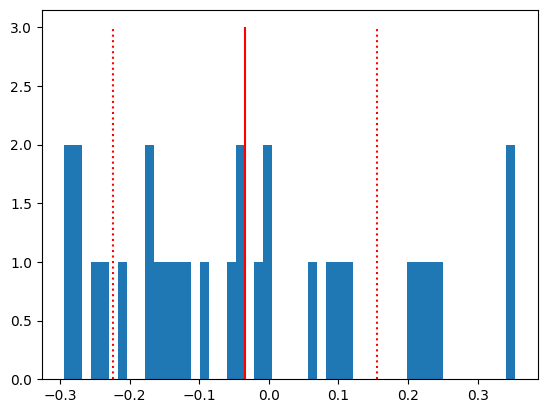

In [3]:
data = get_sales_change_rates_percent(n=30)
show_data(data)
plt.show()


Die 30 Märkte zeigen eine durchschnittliche Umsatzentwicklung von -3,5% und einer Streuung von 18,9 Prozentpunkten. Nun berechnen wir den absoluten Fehler, um zu sehen wie breit das KI ist. Wir verwenden hier die "Standardeinstellungen" die von vielen Softwarepackages verwendet werden.

## Standard Konfidenzintervall
Ganz vanilla: Ein Konfidenzintervall, wie es standardmäßig berechnet wird.

Der absolute Fehler beträgt ± 0.068
n=30, mean=-0.03452769136118003, std=0.18932603472838172


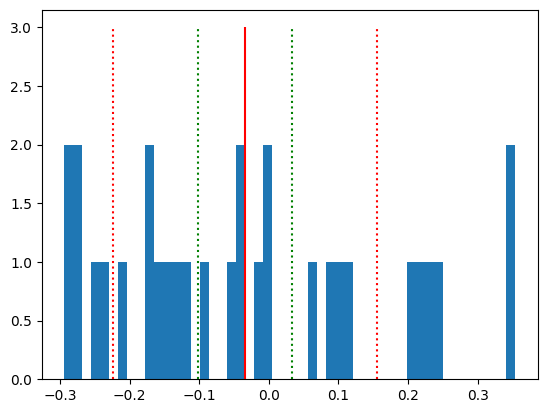

In [4]:
abs_fehler = get_abs_err_confidence_interval(obs=data)
print(f"Der absolute Fehler beträgt ± {abs_fehler:.2}")
results = {"Standard": abs_fehler}
show_data(data, e=abs_fehler)

## Intervall mit Sicherheit 90%
Jetzt könnte es ja auch sein, dass dem Management auch eine 90%-ige Sicherheit reicht. Womöglich gibt es ja schon positive qualitative Rückmeldungen aus der Vertriebsorganisation und quantitative Ergebnisse der Marktforschung, die wir nicht so einfach in unsere Analyse einbinden können. Schauen wir mal, was dann passiert.

Der absolute Fehler beträgt ± 0.057
n=30, mean=-0.03452769136118003, std=0.18932603472838172


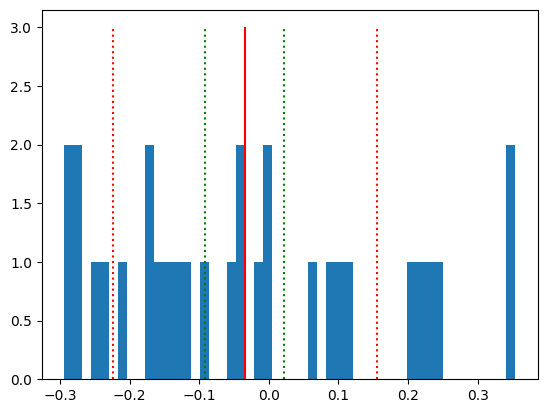

In [5]:
abs_fehler = get_abs_err_confidence_interval(obs=data, alpha=0.1)
print(f"Der absolute Fehler beträgt ± {abs_fehler:.2}")
results["+alpha 10%"] = abs_fehler
show_data(data, e=abs_fehler)


Ah ja: Das absolute Fehler schrumpft um mehr als 1 Prozentpunkt.

## Intervall mit Sicherheit 90% und einseitiger Hypothese
Jetzt hatten wir wahrscheinlich nur die Hypothese, dass der Umsatz durch das neue Konzept steigt. Allein diese Annahme, die wir für uns selbst im Gehirn festlegen können, bewirkt wieder einen anderen kritischen Wert. Daher schrumpft der absolute Fehler wieder um mehr als einen Prozentpunkt!

Der absolute Fehler beträgt ± 0.044
n=30, mean=-0.03452769136118003, std=0.18932603472838172


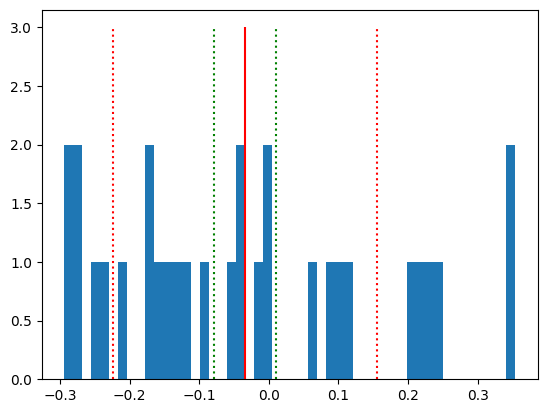

In [6]:
abs_fehler = get_abs_err_confidence_interval(obs=data, alpha=0.1, sided=1)
print(f"Der absolute Fehler beträgt ± {abs_fehler:.2}")
results["+sided"] = abs_fehler
show_data(data, e=abs_fehler)

Soweit zu den "Klassikern" der Statistik. Aber jetzt wird es erst richtig interessant!

![wait](wait.jpeg)

## Intervall mit Sicherheit 90%, einseitiger Hypothese und kleiner Grundgesamtheit
Total wichtig und wird häufig vergessen: Wie oben genannt, wird häufig von eine "unendlichen" Grundgesamtheit ausgegangen. Das ist in der Regel auch fast immer "okay". Wenn die Anzahl der Untersuchungsobjekte weniger als 5% der GG ausmachen, macht es praktisch kaum einen Unterschied. In unserem Fall aber untersuchen wir 30 (n) von 120 (N) Märkten. 
- Einerseits "ohne Zurücklegen": Ein Markt kann ja nicht gleichzeitig in zwei Varianten umgebaut werden.
- Andererseit beobachten immerhin 25% der Fälle. Das gibt mir schon eine höhere Sicherheit als wenn ich 30 von 3000 Märkten (=1%) beobachte.

Daher Bedarf es laut der oben eingebundenen Grafik einer Endlichkeitskorrektur. Oder in cooler: _finite multiplier_.

Endlichkeitskorrektur = $\left(\dfrac{N-n}{N-1}\right)$ 

Also wenn zum Beispiel 30 von 120 Subjekten untersucht werden: $\left(\dfrac{120-30}{120-1}\right) \approx 0.75$

Dadurch schrumpft der absolute Fehler wieder einmal um mehr als einen Prozentpunkt. 

Der absolute Fehler beträgt ± 0.034
n=30, mean=-0.03452769136118003, std=0.18932603472838172


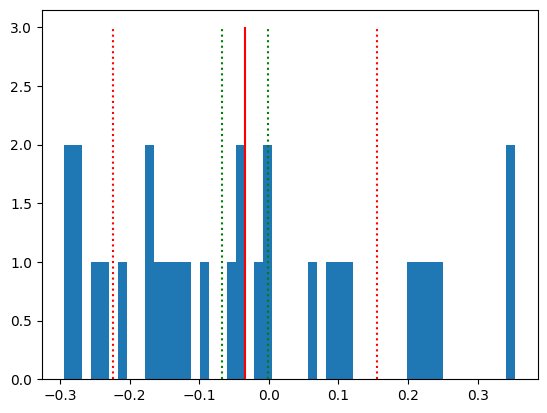

In [7]:
N=120
abs_fehler = get_abs_err_confidence_interval(obs=data, alpha=0.1, sided=1, N=N)
print(f"Der absolute Fehler beträgt ± {abs_fehler:.2}")
results["+GG"] = abs_fehler
show_data(data, e=abs_fehler)

Schön und gut, aber was bedeutet das im Extremfall? Sagen wir, wir haben das Konzept nur in 30 Märkten anwenden wollen, und gar nicht in 120. Was passiert dann?
1. Inhaltich begründet: Dann gibt es keine Grundgesamtheit auf die wir schließen wollen und Inferenzstatistik macht keinen Sinn. Oder anders: Wir haben ja bereits 100% der GG beobachtet. Die Ergebnisse sind also per Definition "Signifikant".
2. Mathematisch begründet: Die Endlichkeitskorrektur ist "0".

$\left(\dfrac{30-30}{30-1}\right)=0$

Also allein unsere Gedanken und Absichten führen dazu, dass dieselben Daten unterschiedliche Konfidenzintervalle erzeugen. Dazu zwei Gedanken:
1. Verrückt.
2. Macht aber auch Sinn, wenn man mal darüber nachdenkt.

![mind](mind-blow-galaxy.gif "https://tenor.com/view/mind-blow-galaxy-explode-boom-fireworks-gif-5139389")

## Intervall mit Sicherheit 90%, einseitiger Hypothese, kleiner Grundgesamtheit und bekannter Streuung der Grundgesamtheit

Und weiter gehts! Jetzt zeigt der oben genannte Entscheidungsbaum, dass wir idealerweise die Streuung der Grundgesamtheit $\sigma$ verwenden. Wenn wir diese nicht haben, müssen wir auf die aus der Stichprobe geschätzen Streuung $\hat\sigma$ zurückgreifen.

Was bedeutet das jetzt genau? Kennen wir die Streuung in der Grundgesamtheit wirklich nicht? Zur Erinnerung: Wir wollen darauf schließen, wie das Konzept in der Grundgesamtheit (den 120 Märkten) funktionieren würde (konjunktiv). Kennen wir nun die Streuung der 120 hypothetisch umgesetzten Märkte oder nicht?

Streng genommen nicht. Denn es wurden ja noch nicht alle Märkte mit dem neuen Konzept beglückt. Aber was ist die Alternative? Die Streuung der Stichprobe ist leider nur auf 30 Märkten berechnet. Ist das jetzt besser?

Meine Empfehlung: Nachdenken. Inhaltlich gesehen würde ich annehmen, dass sich die Streuung durch das neue Konzept nicht ändert. Wir erhoffen uns schließlich nur eine positive Veränderung des Mittelwertes $\mu$ ohne dass sich sonstige äußere Einflüsse verändern, welche die die Streuung $\sigma$ verändern. Z.B eine Baustelle vor dem Markt (negativ) oder die Schließung eines Wettbewerbers (positiv) führt zu Streuung, die unabhängig vom Konzept eintritt.

Die Streuung der Grundgesamtheit ist inhaltlich gesehen wahrscheinlich die beste Annährung. Daher ändert sich das Konfidenzintervall also wieder ein bisschen.

Der absolute Fehler beträgt ± 0.036
n=30, mean=-0.03452769136118003, std=0.18932603472838172


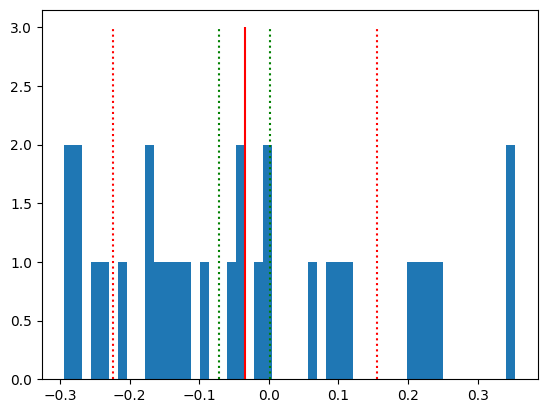

In [8]:
sigma_gg = 0.206
abs_fehler = get_abs_err_confidence_interval(obs=data, alpha=0.1, sided=1, N=N, gg_sigma=sigma_gg)
print(f"Der absolute Fehler beträgt ± {abs_fehler:.2}")
results["+GG-sigma"] = abs_fehler
show_data(data, e=abs_fehler)

## Intervall mit Sicherheit 90%, einseitiger Hypothese, kleiner Grundgesamtheit und Annahme einer T-Verteilung statt Normalverteilung

Vielleicht ist uns aber auch die Annahme, das wir die Streuung aus der Grundgesamtheit verwenden wollen zu heikel. Wer weiß, es könnte ja sein, dass das neue Konzept in manchen Märkten uberproportional gut funktioniert und in anderen Märkten unterproportional schlecht. Die Streuung aus der heutigen Grundgesamtheit wäre dann kein guter Indikator. Wenn wir noch einmal ob in den Entscheidungsbaum schauen, wären wir demzufolge bei Fall 4: 
- Wir berechnen aus der Streuung der Stichprobe einen Schätzer für die Streuung der GG. 
- Wir ziehen ohne Zurücklegen. (Wir brauchen also eine Endlichkeitskorrektur.)
- Aber was steht hier noch? 

In diesem Fall können wir nicht mit einer Normalverteilung rechnen, da wir weniger als 50 Fälle haben. Jetzt müssen wir den kritischen Wert aus der Tabelle der T-Werte. Und schon wieder ändert sich das Konfidenzintervall.

Der absolute Fehler beträgt ± 0.034
n=30, mean=-0.03452769136118003, std=0.18932603472838172


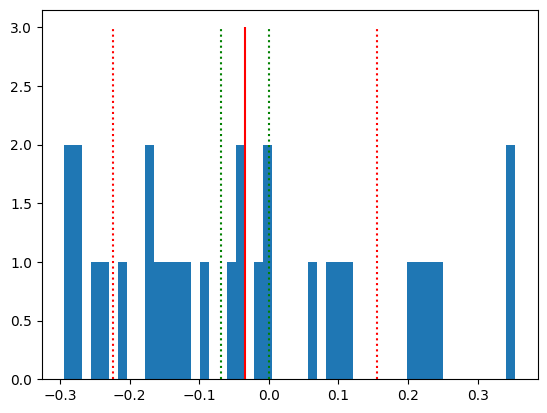

In [9]:
abs_fehler = get_abs_err_confidence_interval(obs=data, alpha=0.1, sided=1, N=N, score="t")
print(f"Der absolute Fehler beträgt ± {abs_fehler:.2}")
results["+t_dist"] = abs_fehler
show_data(data, e=abs_fehler)

## Überblick über Konfidenzintervalle bei unterschiedlichen Prämissen und Fazit

Hier noch einmal zusammengefasst die verschiedenen Ergebnisse. Die Erkenntnisse sind sicher nicht verallgemeinerbar. Aber es zeigt sich dennoch, welchen Einfluss die Rahmenbedingungen bei einer Schätzung haben, obwohl die Daten immer dieselben sind.

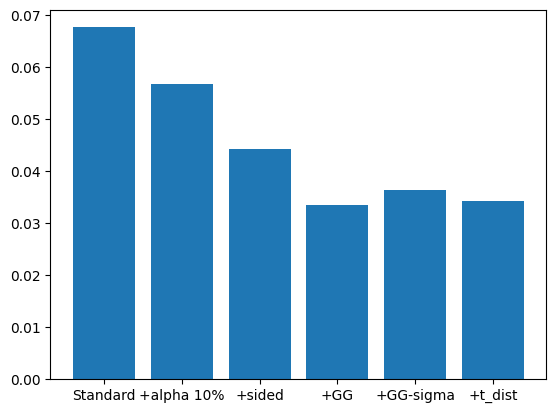

In [10]:
plt.bar(results.keys(), results.values())
plt.show()

# Fazit
Der zentrale Punkt ist für mich, dass ich mir ein paar Gedanken machen sollte, bevor ich ein Konfidenzintervall ausweise oder mich zu "Signifikanz" äußere. 
- Häufig habe ich dadurch eine Scheingenaugkeit erzeugt, die real gar nicht gegeben ist. Man sagt: "Ich glaube das Ergebnis." obwohl man Willkür genaugenommen nur auf die Wahl des $\alpha$-Wertes verlagert.
- Häufig habe ich von Signifikanz gesprochen, obwohl es gar keine Grundgesamtheit gibt, auf die man schließen könnte.
- Häufig habe ich von Signifikanz gesprochen, obwohl gar keine Zufallsauswahl stattgefundet hat. 
- Häufig habe ich sozialwissenschaftliche Konventionen unreflektiert übernommen. 
    - Warum $\alpha=0.05$? (Momentan gibt es z.B. in der Psychologie Diskussionen, ob man nicht viel geringere $\alpha$-Werte wählen müsste.)
    - Warum ziehen mit zurücklegen?  
    - Ist die Streuung der GG tatsächlich unbekannt?


# Exkurs 1: Warum ist die Stichprobenfunktions t- oder normalverteilt auch wenn die Grundgesamtheit nicht t- oder normalverteilt ist?

0.020377383883187702 0.2066970165396848


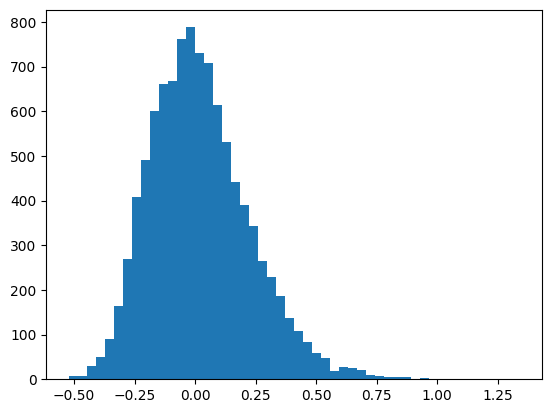

0.019805606698197555 0.03744223602519722 0.19977366945543926


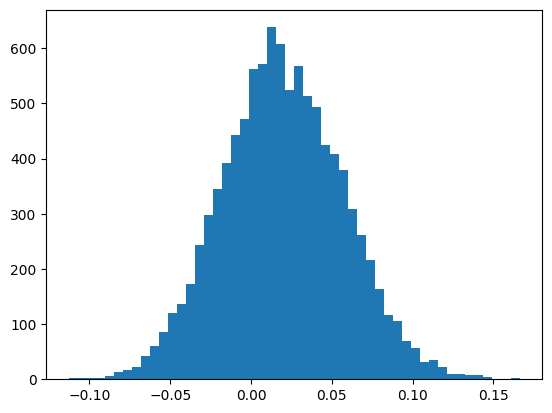

In [6]:
# Verteilung von 10000 Datenpunkten anzeigen
data = get_sales_change_rates_percent(n=10000)
plt.hist(data, bins=50)
print(np.mean(data), np.std(data))
plt.show()

# 10000 mal den Mittelwert von 30 Datenpunkten anzeigen.
means = []
stds = []
for i in range(10000):
    data = get_sales_change_rates_percent(n=30)
    means.append(data.mean())
    stds.append(data.std())

plt.hist(means, bins=50)
print(np.mean(means), np.std(means), np.mean(stds))
plt.show()

# Exkurs 2: Warum wird bei der Schätzung  der Streuung der Grundgesamtheit durch die Streuung der Stichprobe durch $(n-1)$ geteilt?

Vielleicht ist Dir schon aufgefallen, dass wir für den Mittelwert oder die Streuung jeweils verschiedene Symbole verwenden. Zum Beispiel beim Mittelwert:

Mittelwert der Stichprobe: $\overline{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}=\frac{1}{n}\left(x_{1}+\cdots+x_{n}\right)$

Mittelwert der Grundgesamtheit: $\mu=\frac{1}{n} \sum_{i=1}^{n} x_{i}=\frac{1}{n}\left(x_{1}+\cdots+x_{n}\right)$

Schätzer für den Mittelwert der Grundgesamtheit durch die Stichprobe: $\hat\mu=\bar x$

Hört sich erstmal recht simpel an: Wenn ich den Mittelwert der GG schätzen möchte, ist der Mittelwert der Stichprobe wahrscheinlich am besten. Bei der Standardabweichung ist das aber nicht so.

Standardabweichung der Stichprobe: $s = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2}$

Standardabweichung der Grundgesamtheit: $\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$

Schätzer für die Standardabweichung der Grundgesamtheit durch die Stichprobe: $\hat\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2}=WTF?$

Was lernen wir?
- Wenn wir von der GG sprechen, nehmen wir griechische Buchstaben anstelle von lateinischen.
- Analog sagt man z.B. 
    - bei Anteilswerten: $p$ und $\pi$ ("pi")
    - bei Korrelationen: $r$ und $\rho$ ("rho")
- Wenn wir Parameter (z.B. Mittelwert, Standardabweichung, Anteilswert ...) von der GG schätzen, packen wir ein "Dach" drauf. Also z.B. $\hat\rho$, $\hat\mu$ oder $\hat\sigma$.
- Ganz allgemein nennt man die Parameter der GG in Formeln auch häufig $\theta$ ("theta") und den Schätzer von $\theta$ nennt man dann $\hat\theta$ ("theta dach"). 
- Die Streuung der Stichprobe ist nicht der ideale Schätzer für die Streuung der Grundgesamtheit. In dem Schätzer verbirgt sich nämlich noch ein $(n-1)$.

## Intuition
Aber warum ist das so? Bauen wir uns mal ein bisschen Intuition!

Der Nenner $(n-1)$ führt zu folgenden Effekten:
- Da wir durch $(n-1)$ teilen, werden wir die Streuung der GG immer etwas höher einschätzen als die Streuung der Stichprobe.
- Dieser Effekt hat bei kleineren Stichproben einen höhereren Einfluss. Bei 10.000 Beobachtungen würden wir durch 9.999 teilen. Das Ergebnis ist also fasst das gleiche. Bei 5 Beobachtungen würden wir jedoch durch 4 anstelle durch 5 teilen und somit eine 25% erhöhte Streuung erhalten.

### Intuition beim Extremfall n = 1
Jetzt stellen wir uns den Extremfall vor: Wir haben nur eine Beobachtung - sagen wir ein Markt mit +2% Umsatz. Beschreiben wir zunächst die Stichprobe: Der Mittelwert $\bar x$ ist 2. Laut Formel oben ist die Standardabweichung $s = 0$. Das erscheint sinnvoll, da wir ja auch wirklich keine Streuung in der Stichprobe haben. Aber können wir mit dieser Stichprobe die Streuung der GG schätzen? Haben wir überhaupt einen Ausgangspunkt? Genau genommen nicht! $s=\hat\sigma = 0$ wäre sicher kein guter Schätzer, da die "0" ja dadaurch entsteht, dass wir nur einen Fall erhoben haben, und nicht dadurch, dass es der beste Anhaltspunkt ist, den wir haben. Wir können als gar keine Aussage treffen! Mathematisch drückt sich dass bei $\hat\sigma$ dadurch aus, dass wir durch $(n-1)=(1-1)=0$ teilen. Es entsteht also eine Division durch 0. Auf deutsch = nicht möglich. Weiterhin wäre eine Schätzung von $\sigma$ durch "0" in der Regel untertrieben. Die Streuung der GG $\sigma$ wird meisten höher sein aber nie geringer!

Anders ist es bei $\bar x=\hat\mu=2$: Auch wenn wir nur einen Fall haben, würden wir schon vermuten, dass der Mittelwert der GG wahrscheinlicher in der Nähe von 2 liegt also z.B. in der Nähe von 1000.

### Intuition bei geringen Fallzahlen

Nun, da wir die Intuition bei n = 1 verstanden haben, müssen wir uns nach fragen, warum wir auch bei n=2 oder n=3 eine so starke Korrektur durchführen sollten. Schauen wir und noch einmal oben die Formeln an. 

Was genau unterscheidet die Standardabweichung der Stichprobe $s$ genau von der Standardabweichung der Grundgesamtheit $\sigma$? 
- Bei der Stichprobe suchen wir die Abweichung der Beobachtungen zu Mittelwert der Stichprobe $\bar x$.
- Bei der Grundgesamtheit suchen wir die Abweichung der Beobachtungen zu Mittelwert der Grundgesamtheit $\mu$. 

Und jetzt kommt der mind fuck: Obwohl $\bar x$ ein guter Schätzer $\hat\mu$ für $\mu$ ist, liegt es doch genau daran, dass $\mu$ und $\bar x$ nicht gleich sein _müssen_! Und dafür schauen wir uns nun das Beispiel in der folgenden Grafik an:

Stell dir vor, wir haben eine Grundgesamtheit mit dem __Mittelwert__ $\mu=1$. Jetzt ziehen wir drei Datenpunkte 0, 2 und 4. Das heißt unser Schätzer für $\mu$ ist $\bar x=2$. Also ist unser Schätzer $\hat\mu=2$. Das macht auch weiterhin Sinn. Wenn wir sonst nichts über die Grundgesamtheit wüssten, wäre 2 immernoch der wahrscheinlichste Wert.

Aber wie sieht es nun bei der __Standardabweichung__ aus? Die Standardabweichung der Stichprobe besteht aus den durchschnittlichen Abweichungen (grüne Pfeile) der Beobachtungen zum _eigenen_ Mittelwert (grüne gestrichelte Linie)!

Standardabweichung der __Stichprobe__: $s=\frac{2+2+0}{3}=1\frac{1}{3}$

Jedoch suchen wir ja gar nicht die Abweichungen zum eigenen Mittelwert (grüne Pfeile), sondern die Abweichung zum Mittelwert der Grundgesamtheit $\mu$ (blaue Pfeile)!

Durchschnittliche Abweichung zum Mittelwert der __Grundgesamtheit__: $\frac{3+1+1}{3}=1\frac{2}{3}$ 

![dach](sigma_dach.png "Eigene Darstellung inspiriert von youtube")

Wir sehen also, dass wir zu niedrig liegen! Der Mittelwert der Stichprobe ist nämlich _immer_ der Punkt mit den geringsten Abweichungen zu den Beobachtungen. Wir werden _nie_ einen Punkt finden, der weniger Abeichungen zu den Beobachtungen (grüne Pfeile) hat als $\bar x=2$ (grüne gestrichelte Linie). $\bar x$ ist der "optimale" Punkt mit der minimalsten Abweichung $1\frac{1}{3}$.

Das heißt im Umkehrschluss aber auch, dass wir die Streuung _immer_ unterschätzen, wenn
- ... mathematisch: $\bar x\neq\mu$
- ... sprachlich: der Mittelwert der Stichprobe nicht genau dem Mittelwert der Grundgesamtheit entspricht! 

Wir werden also bestenfalls richtig schätzen, meistens jedoch zu gering. Die _Wahrscheinlichkeit_ richtig zu schätzen ist jedoch geringer, wenn wir weniger Beobachtungen haben. Denn bei geringeren Fallzahlen steigt ja der absolute Fehler von $\hat\mu$. Das heißt wir sind weniger sicher, dass wir mit $\hat x$ nah an $\mu$ liegen, wenn wir z.B. nur 3 Fälle haben. Und genau das korrigiert die Division durch $(n-1)$! Tschakka! 

Warum wir genau mit der Division durch $(n-1)$ korrigieren und nicht anders, lässt sich mathematisch gut zeigen. Aber ich habe keine Intuition dafür. Und diese Kapitel heißt nun mal "Intuition". ;)

## Empirie
Schauen wir uns doch mal an, wie stark wir daneben liegen, wenn wir uns die Standardabweichungen "ohne $(n-1)$" berechnen und ziehen ein paar Stichproben aus einer Grundgesamtheit mit $\sigma=0.2$.

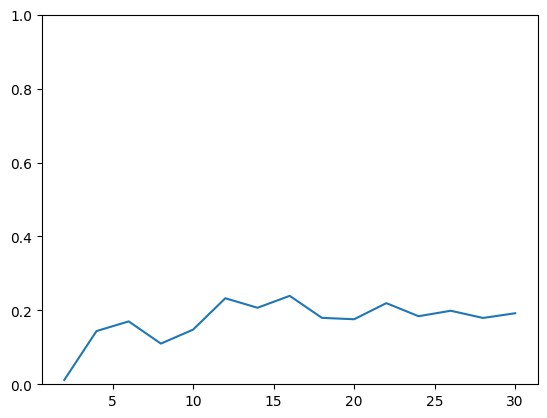

In [24]:
stds = {}
for i in range(2, 32, 2):
    for _ in range(10000):
        temp =[]
        data = get_sales_change_rates_percent(n=i)
        temp.append(np.std(data))
    stds[i] = np.mean(temp)

plt.plot(stds.keys(), stds.values(), scaley=False)
plt.show()
    

Wir sehen dass wir insb. bei kleineren Strichproben (X-Achse) die tatsächliche Streuung (Y-Achse) von 0,2 unterschätzen. Schauen wir uns mal an, was passiert, wenn wir $(n-1)$ berücksichtigen.

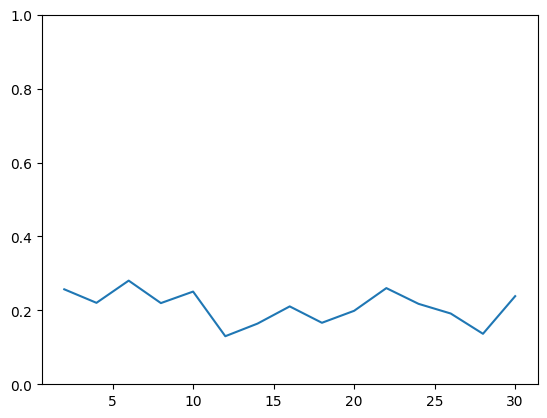

In [22]:
stds = {}
for i in range(2, 32, 2):
    for _ in range(10000):
        temp =[]
        data = get_sales_change_rates_percent(n=i)
        temp.append(np.std(data, ddof=1))
    stds[i] = np.mean(temp)

plt.plot(stds.keys(), stds.values(), scaley=False)
plt.show()

Wir sehen, dass wir insb. bei kleineren Stichproben nun nicht mehr unterschätzen! Yeah!